## Enunciado

> Considere la información del proyecto cuya información aparece en la tabla adjunta:
> 1. ¿Cuál es la probabilidad de terminar el proyecto antes de 9 periodos?
> 2. Indique las actuaciones a llevar a cabo para reducir la duración del proyecto hasta 10 periodos con mínimo sobrecoste.
> 3. Nivele los recursos del proyecto.

In [1]:
# Alargamos el ancho de las celdas
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, desviacion,  cur,  recursos, duracion_tope
     ('A',       '---  ',     3,        2,          5,       1,        1      ),
     ('B',       '---  ',     2,        1,          5,       1,        1      ),  
     ('C',       'B    ',     4,        2,         25,       1,        2      ),
     ('D',       'A    ',     4,        0,          1,       1,        1      ),
     ('E',       'A    ',     2,        1,        -10,       2,        1      ), 
     ('F',       'C,D  ',     5,        3,          1,       1,        2      ),
     ('G',       'C,D  ',     1,        0,        -20,       2,        1      ),
     ('H',       'E    ',     3,        1,          5,       1,        2      ),
     ('I',       'F,G  ',     1,        0,          5,       2,        1      ),
     ('J',       'F,G  ',     2,        0,         -1,       1,        1      ),
     ('K',       'F,G,H',     1,        0,          1,       1,        1      ),
] ,columns=['actividad', 'precedentes', 'duracion', 'desviacion', 'cur', 'recursos', 'duracion_tope']).set_index('actividad')

datos_enunciado

,precedentes,duracion,desviacion,cur,recursos,duracion_tope
actividad,,,,,,
A,---,3,2,5,1,1
B,---,2,1,5,1,1
C,B,4,2,25,1,2
D,A,4,0,1,1,1
E,A,2,1,-10,2,1
F,"C,D",5,3,1,1,2
G,"C,D",1,0,-20,2,1
H,E,3,1,5,1,2
I,"F,G",1,0,5,2,1


## Solución
### Apartado 1

> ¿Cuál es la probabilidad de terminar el proyecto antes de 9 periodos?




#### Duración media del proyecto

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [2]:
from pmule import GrafoProyecto

La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [3]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A', 1,  3 ),
  (  'B', 1,  2 ),
  (  'C', 2,  4 ),
  (  'D', 3,  4 ),
  (  'E', 3,  5 ),
  (  'F', 4,  7 ),
  (  'G', 4,  6 ),
  (  'H', 5,  8 ),
  (  'I', 7, 10 ),
  (  'J', 7,  9 ),
  (  'K', 8, 10 ),
  ( 'f1', 6,  7 ),
  ( 'f2', 7,  8 ), 
  ( 'f3', 9, 10  ),   

] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')

datos_proyecto = pd.concat([datos_enunciado, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,duracion,desviacion,cur,recursos,duracion_tope,nodo_inicial,nodo_final
actividad,,,,,,,,
A,---,3.0,2.0,5.0,1.0,1.0,1,3
B,---,2.0,1.0,5.0,1.0,1.0,1,2
C,B,4.0,2.0,25.0,1.0,2.0,2,4
D,A,4.0,0.0,1.0,1.0,1.0,3,4
E,A,2.0,1.0,-10.0,2.0,1.0,3,5
F,"C,D",5.0,3.0,1.0,1.0,2.0,4,7
G,"C,D",1.0,0.0,-20.0,2.0,1.0,4,6
H,E,3.0,1.0,5.0,1.0,2.0,5,8
I,"F,G",1.0,0.0,5.0,2.0,1.0,7,10


In [4]:
proyecto = GrafoProyecto(datos_proyecto)

##### Grafo PERT con numeración de nodos

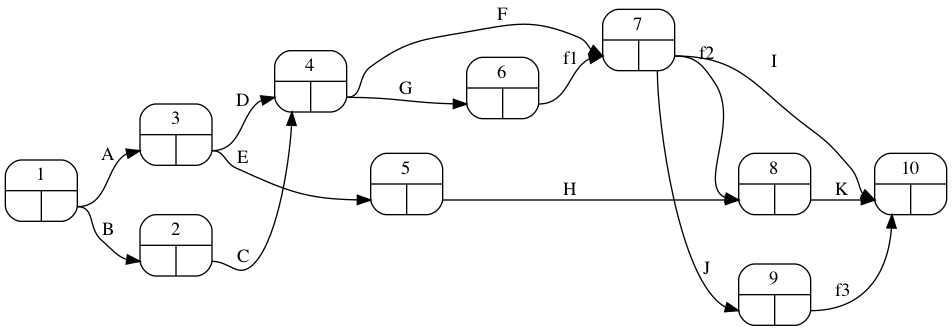

In [5]:
proyecto.pert(filename='pert_nodos.png',
              duraciones=None,
              orientation='portrait', ranksep=0.5, nodesep=0.5)

##### Matriz de Zaderenko 

In [6]:
zaderenko = proyecto.zaderenko(datos_proyecto['duracion'])
zaderenko

,1,2,3,4,5,6,7,8,9,10,temprano
1,,2,3,,,,,,,,0
2,,,,4,,,,,,,2
3,,,,4,2,,,,,,3
4,,,,,,1,5,,,,7
5,,,,,,,,3,,,5
6,,,,,,,0,,,,8
7,,,,,,,,0,2,1,12
8,,,,,,,,,,1,12
9,,,,,,,,,,0,14
10,,,,,,,,,,,14


In [7]:
resultados_pert = proyecto.calcula_pert(duraciones=datos_proyecto['duracion'])
resultados_pert['tiempos']

,tempranos,tardios
1,0.0,0.0
2,2.0,3.0
3,3.0,3.0
5,5.0,10.0
4,7.0,7.0
6,8.0,12.0
7,12.0,12.0
8,12.0,13.0
9,14.0,14.0
10,14.0,14.0


##### Duración media del proyecto

La duración media del proyecto es:

In [8]:
duracion_media_proyecto = proyecto.duracion_proyecto(duraciones=datos_proyecto['duracion'])
duracion_media_proyecto

14.0

#### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico.

##### Holguras

In [9]:
resultados_pert['H_total']

A     0.0
B     1.0
C     1.0
D     0.0
E     5.0
F     0.0
G     4.0
H     5.0
f1    4.0
I     1.0
J     0.0
f2    1.0
K     1.0
f3    0.0
dtype: float64

##### Camino crítico

In [10]:
camino_critico = proyecto.camino_critico(datos_proyecto['duracion'])
camino_critico

Index(['A', 'D', 'F', 'J', 'f3'], dtype='object')

##### Grafo PERT con indicación del camino crítico

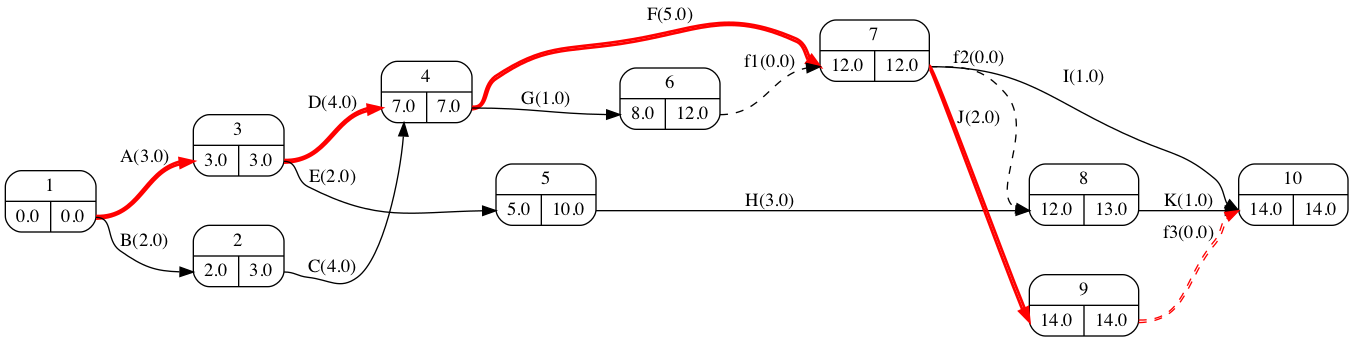

In [11]:
filename='pert_tiempos_apartado_1.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

##### Varianza del camino crítico

A la vista del grafo PERT el camino crítico se compone de 1 rama.

In [12]:
rama_1 = ['A', 'D', 'F', 'J', 'f3']

El enunciado nos aporta la desviación típica, la varianza se calcula elevando al cuadrado.

In [13]:
datos_proyecto.eval('varianza = desviacion ** 0.5', inplace=True)
datos_proyecto

,precedentes,duracion,desviacion,cur,recursos,duracion_tope,nodo_inicial,nodo_final,varianza
actividad,,,,,,,,,
A,---,3.0,2.0,5.0,1.0,1.0,1,3,1.414214
B,---,2.0,1.0,5.0,1.0,1.0,1,2,1.000000
C,B,4.0,2.0,25.0,1.0,2.0,2,4,1.414214
D,A,4.0,0.0,1.0,1.0,1.0,3,4,0.000000
E,A,2.0,1.0,-10.0,2.0,1.0,3,5,1.000000
F,"C,D",5.0,3.0,1.0,1.0,2.0,4,7,1.732051
G,"C,D",1.0,0.0,-20.0,2.0,1.0,4,6,0.000000
H,E,3.0,1.0,5.0,1.0,2.0,5,8,1.000000
I,"F,G",1.0,0.0,5.0,2.0,1.0,7,10,0.000000


###### Varianza rama 1:

In [14]:
datos_proyecto.loc[rama_1, 'varianza']

actividad
A     1.414214
D     0.000000
F     1.732051
J     0.000000
f3    0.000000
Name: varianza, dtype: float64

In [15]:
varianza_rama_1 = datos_proyecto.loc[rama_1, 'varianza'].sum()
varianza_rama_1

3.1462643699419726

In [16]:
desviacion_proyecto = varianza_rama_1 ** 0.5
desviacion_proyecto

1.7737712281864233

#### Probabilidad de terminar antes de 9 periodos

In [17]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_9 = norm.cdf(9, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_9 * 100

0.24097806952197315

### Apartado 2
> Indique las actuaciones a llevar a cabo para reducir la duración del proyecto hasta 10 periodos con mínimo sobrecoste.



#### Reducción a 10 periodos

##### Situación inicial de partida

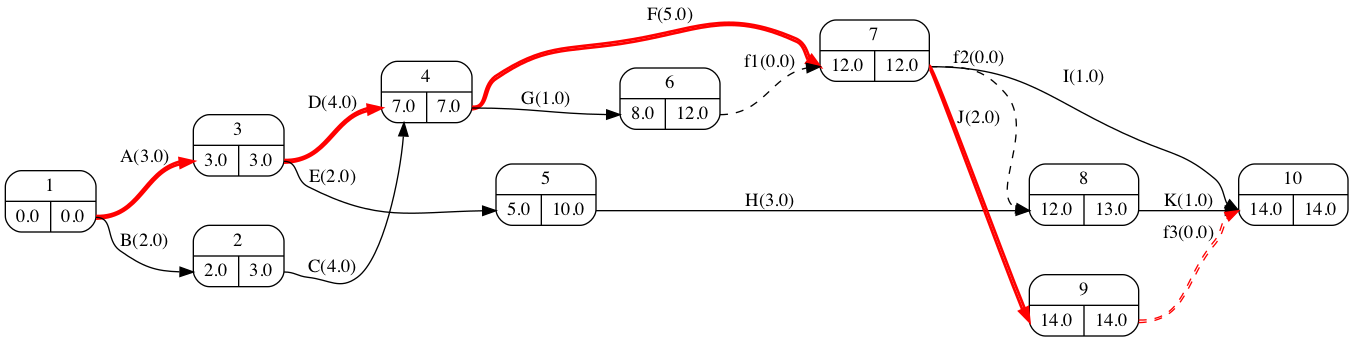

In [18]:
filename='pert_apartado_2_situacion_inicial.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Para analizar el efecto de la reducción de la duración usaremos una nueva matriz para almacenar los datos de las duraciones:


In [19]:
datos_proyecto_reduccion = datos_proyecto.copy()

##### Primera reducción de la duración del proyecto en un periodo

Analizamos los costes unitarios de reducción y la capacidad de reducción de las actividades en cada rama del camino crítico.

###### Análisis rama 1

In [20]:
datos_proyecto_reduccion.loc[rama_1, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
J,-1.0,2.0,1.0
f3,0.0,0.0,0.0
D,1.0,4.0,1.0
F,1.0,5.0,2.0
A,5.0,3.0,1.0


En la rama 1 la actividad reducible más baratas es la J.

###### Reducción de actividades en la primera iteración.

Se propone reducir un periodo la actividad J. El coste asociado a esta reducción es:

In [21]:
datos_proyecto_reduccion.loc[['J'], 'cur'].sum()

-1.0

In [22]:
datos_proyecto_reduccion.loc[['J'], 'duracion'] -=1

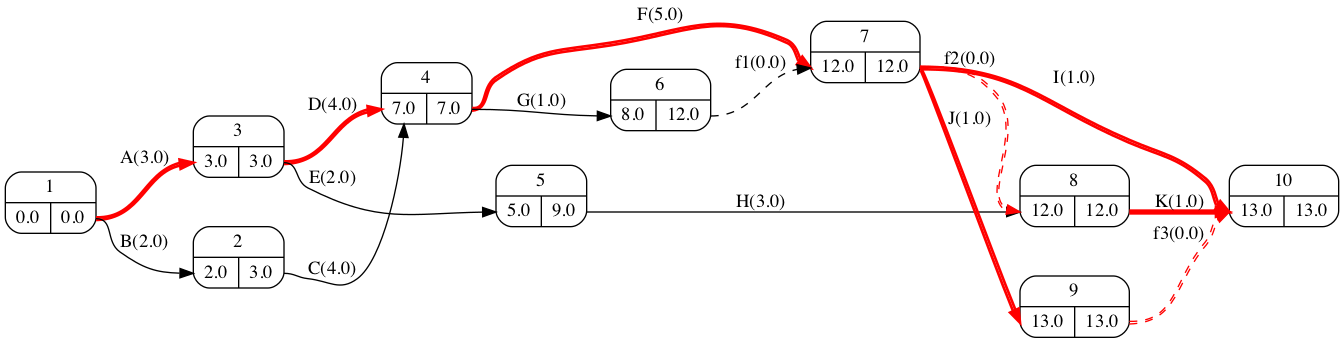

In [23]:
filename='pert_apartado_2_primera_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Tras esta primera reducción han surgido dos ramas críticas adicionales que llamaremos rama 2 y rama 3.

In [24]:
rama_2 = ['A', 'D', 'F', 'f2', 'K']
rama_3 = ['A', 'D', 'F', 'I']

##### Segunda reducción de la duración del proyecto en un periodo

###### Análisis rama 1

In [25]:
datos_proyecto_reduccion.loc[rama_1, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
J,-1.0,1.0,1.0
f3,0.0,0.0,0.0
D,1.0,4.0,1.0
F,1.0,5.0,2.0
A,5.0,3.0,1.0


En la rama 1 las actividades reducibles más baratas son D y F.

###### Análisis rama 2

In [26]:
datos_proyecto_reduccion.loc[rama_2, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
f2,0.0,0.0,0.0
D,1.0,4.0,1.0
F,1.0,5.0,2.0
K,1.0,1.0,1.0
A,5.0,3.0,1.0


En la rama 2 las actividades reducibles más baratas son D y F, que además son comunes con las otras ramas.

###### Análisis rama 3

In [27]:
datos_proyecto_reduccion.loc[rama_3, ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
D,1.0,4.0,1.0
F,1.0,5.0,2.0
A,5.0,3.0,1.0
I,5.0,1.0,1.0


En la rama 3 las actividades reducibles más baratas son D y F, que además son comunes con las otras ramas.

###### Reducción de actividades en la segunda iteración.

Se propone reducir un periodo la actividad D. El coste asociado a tal reducción es:

In [28]:
datos_proyecto_reduccion.loc[['D'], 'cur'].sum()

1.0

In [29]:
datos_proyecto_reduccion.loc[['D'], 'duracion'] -=1

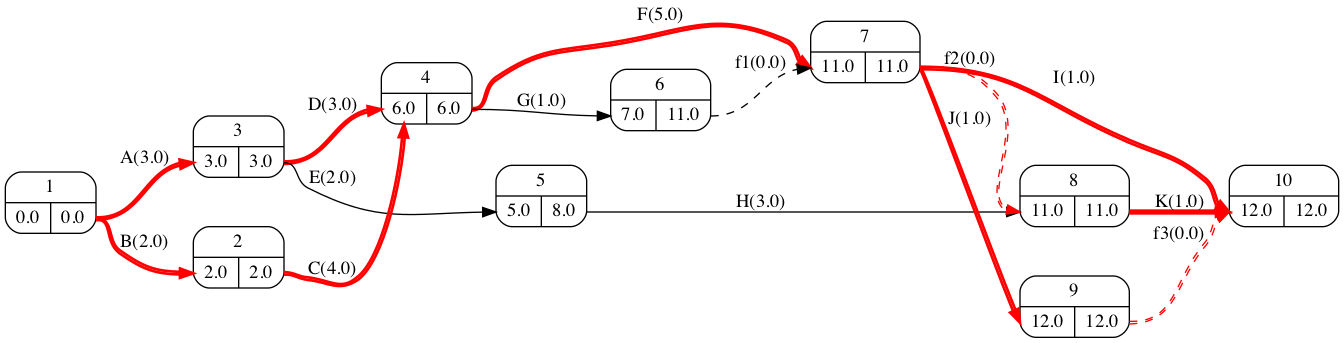

In [30]:
filename='pert_apartado_2_segunda_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Tras esta reducción han surgido nuevas rama del camino crítico que llamaremos rama 4, rama 5 y rama 6.

In [31]:
rama_4 = ['B', 'C', 'F', 'J'] 
rama_5 = ['B', 'C', 'F', 'I']
rama_6 = ['B', 'C', 'F', 'f2', 'K']

##### Tercera reducción de la duración del proyecto en un periodo

###### Análisis ramas 1, 2,  3, 4, 5 y 6

In [32]:
datos_proyecto_reduccion.loc[rama_1 + rama_2 + rama_3 + rama_4 + rama_5 + rama_6
                             , ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
J,-1.0,1.0,1.0
J,-1.0,1.0,1.0
f2,0.0,0.0,0.0
f3,0.0,0.0,0.0
f2,0.0,0.0,0.0
F,1.0,5.0,2.0
D,1.0,3.0,1.0
F,1.0,5.0,2.0
F,1.0,5.0,2.0


La actividad F es común a todas las ramas y es la reducible más barata junto con D.

###### Reducción de actividades en la tercera iteración.

Se propone reducir un periodo la actividad F. El coste asociado a tal reducción es:

In [33]:
datos_proyecto_reduccion.loc[['F'], 'cur'].sum()

1.0

In [34]:
datos_proyecto_reduccion.loc[['F'], 'duracion'] -=1

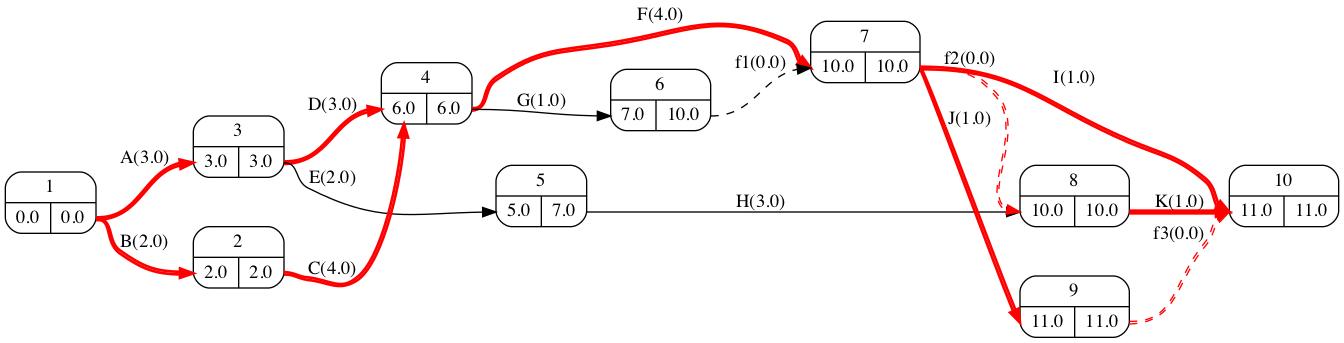

In [35]:
filename='pert_apartado_2_tercera_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Tras esta reducción no surge ningún camino crítico.

##### Cuarta reducción de la duración del proyecto en un periodo

###### Análisis ramas 1, 2,  3, 4, 5 y 6

In [36]:
datos_proyecto_reduccion.loc[rama_1 + rama_2 + rama_3 + rama_4 + rama_5 + rama_6
                             , ['cur', 'duracion', 'duracion_tope']].sort_values(by='cur')

,cur,duracion,duracion_tope
actividad,,,
J,-1.0,1.0,1.0
J,-1.0,1.0,1.0
f2,0.0,0.0,0.0
f3,0.0,0.0,0.0
f2,0.0,0.0,0.0
F,1.0,4.0,2.0
D,1.0,3.0,1.0
F,1.0,4.0,2.0
F,1.0,4.0,2.0


La actividad F es común a todas las ramas y es la reducible más barata junto con D.

###### Reducción de actividades en la cuarta iteración.

Se propone reducir un periodo la actividad F. El coste asociado a tal reducción es:

In [37]:
datos_proyecto_reduccion.loc[['F'], 'cur'].sum()

1.0

In [38]:
datos_proyecto_reduccion.loc[['F'], 'duracion'] -=1

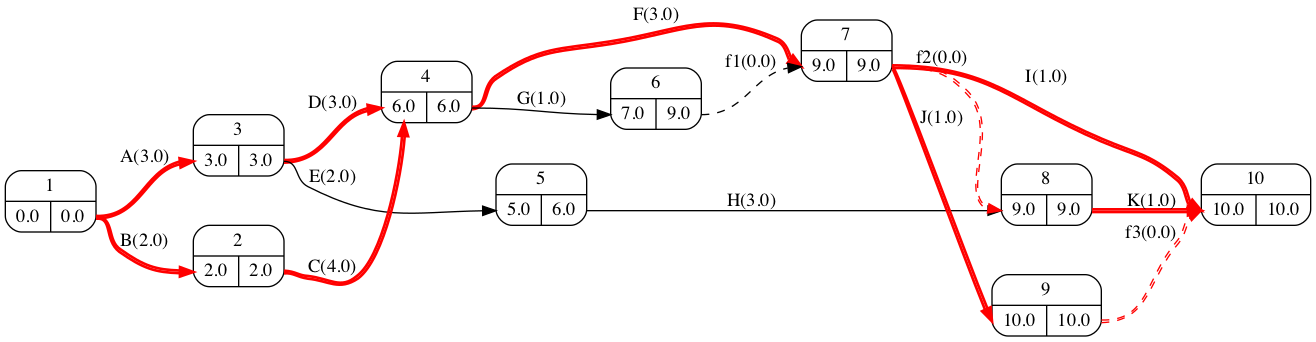

In [39]:
filename='pert_apartado_2_cuarta_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Tras esta reducción ya se ha alcanzado el objetivo de 10 periodos de duración.

### Apartado 3
> Nivele los recursos del proyecto.

#### Análisis de la situación inicial

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [40]:
gantt_recursos = proyecto.gantt(duraciones  = datos_proyecto['duracion'],
                                representar = datos_proyecto['recursos'],
                                total='fila',
                                holguras = True
                               )
gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,2,2,,,,,,,,,,5
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,1,1,1,,,,,,,5
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


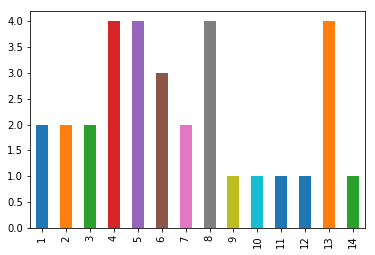

In [41]:
(gantt_recursos.data.loc['Total']
   .drop('H_total')
   .plot(kind='bar'));

La demanda de recursos actual no se encuentra nivelada. Se procede a aplicar el algoritmo de nivelación.

La suma de la serie de cuadrados de los recursos para la situación inicial es:

In [42]:
recursos_al_cuadrado = (gantt_recursos
                        .data
                        .loc['Total',:]
                        .drop('H_total')
                        ** 2)
recursos_al_cuadrado

1      4
2      4
3      4
4     16
5     16
6      9
7      4
8     16
9      1
10     1
11     1
12     1
13    16
14     1
Name: Total, dtype: object

In [43]:
recursos_al_cuadrado.sum()

94.0

#### Orden de desplazamientos

Se aplican las siguientes reglas:
   - Se desplazan primero aquellas no críticas aun no desplazadas con su final más temprano más próximo al principio del proyecto.
   - En caso de empate se preferirá mover primero la de mayor holgura.
   - De persistir el empate se moverá la de menor duración.
   - Descartamos del análisis las actividades f1 y f2 por no consumir recursos.
   - En caso de persistir el empate, resulta indiferente una u otra.

El orden a seguir en este caso será:

In [44]:
(proyecto.calendario(duraciones=datos_proyecto['duracion'])
   .loc[:, ['fin_mas_temprano', 'H_total', 'duracion']]
   .sort_values(by=['fin_mas_temprano', 'H_total', 'duracion'], ascending=[True, False, True])
   .query('H_total > 0')
   .drop(['f1', 'f2'])
)

,fin_mas_temprano,H_total,duracion
actividad,,,
B,2.0,1.0,2.0
E,5.0,5.0,2.0
C,6.0,1.0,4.0
H,8.0,5.0,3.0
G,8.0,4.0,1.0
I,13.0,1.0,1.0
K,13.0,1.0,1.0


No obstante, a medida que vayamos desplazando tareas las holguras cambiarán y algunas actividades se convertirán en críticas.

#### Desplazamientos de la actividad B

###### B: 1

In [45]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'B': 1,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,,1,1,,,,,,,,,,,,0
C,,,,1,1,1,1,,,,,,,,0
D,,,,1,1,1,1,,,,,,,,0
E,,,,2,2,,,,,,,,,,5
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,1,1,1,,,,,,,5
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [46]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

96.0

La mejor opción es no mover B.

#### Desplazamientos de la actividad E

###### E: 1

In [47]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 1,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,2,2,,,,,,,,,4
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,1,1,1,,,,,,4
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [48]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

92.0

###### E: 2

In [49]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 2,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,2,2,,,,,,,,3
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,1,1,1,,,,,3
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [50]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

88.0

###### E: 3

In [51]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 3,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,2,2,,,,,,,2
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,,1,1,1,,,,2
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [52]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

88.0

###### E: 4

In [53]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 4,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,2,2,,,,,,1
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,,,1,1,1,,,1
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [54]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

88.0

###### E: 5

In [55]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [56]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

80.0

La mejor opción es E: 5 con una suma de cuadrados de 80.

#### Desplazamientos de la actividad C

###### C: 1

In [57]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                 'C': 1,
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,0
C,,,,1,1,1,1,,,,,,,,0
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [58]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

80.0

La mejor opción es no retrasar C.

#### Desplazamientos de la actividad G

###### G: 1

In [59]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                 'G': 1
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,,2,,,,,,3
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [60]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

88.0

###### G: 2

In [61]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                 'G': 2
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,,,2,,,,,2
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [62]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

88.0

###### G: 3

In [63]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                 'G': 3
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,,,,2,,,,1
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [64]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

84.0

###### G: 4

In [65]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                 'G': 4
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,,,,,2,,,0
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [66]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

84.0

La mejor opción es no retrasar G.

#### Desplazamientos de la actividad I

###### I: 1

In [67]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5,
                                                 'I': 1
                                                })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,,2,0
J,,,,,,,,,,,,,1,1,0


In [68]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

80.0

La mejor opción es no retrasar I.

#### Nivelación óptima

Tras los análisis de los desplazamientos, la mejor opción es retrasar:
    - E: 5 periodos

In [69]:
desplazamiento = proyecto.desplazar(duraciones=datos_proyecto['duracion'],
                                    actividades={'E': 5 })

nuevo_gantt_recursos = desplazamiento['proyecto'].gantt(
    duraciones=desplazamiento['duraciones'],
    representar=datos_proyecto['recursos'],
    total='fila',
    holguras=True)

nuevo_gantt_recursos

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,H_total
A,1,1,1,,,,,,,,,,,,0
B,1,1,,,,,,,,,,,,,1
C,,,1,1,1,1,,,,,,,,,1
D,,,,1,1,1,1,,,,,,,,0
E,,,,,,,,,2,2,,,,,0
F,,,,,,,,1,1,1,1,1,,,0
G,,,,,,,,2,,,,,,,4
H,,,,,,,,,,,1,1,1,,0
I,,,,,,,,,,,,,2,,1
J,,,,,,,,,,,,,1,1,0


In [70]:
recursos_al_cuadrado = (nuevo_gantt_recursos.data.loc['Total',:].drop('H_total') ** 2).sum()
recursos_al_cuadrado

80.0